In [2]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# An example of denoising a signal using the Fast Fourier Transform (FFT)
## Based of the MATLAB example from Ch. 2 of Brunton's "Data Driven Science and Engineering" 
### Create time-based function, f(t), with frequencies of 50 and 120 Hz


In [3]:
dt = 0.001
t = np.arange(0,1,dt)

print (len(t))

1000


<IPython.core.display.Javascript object>


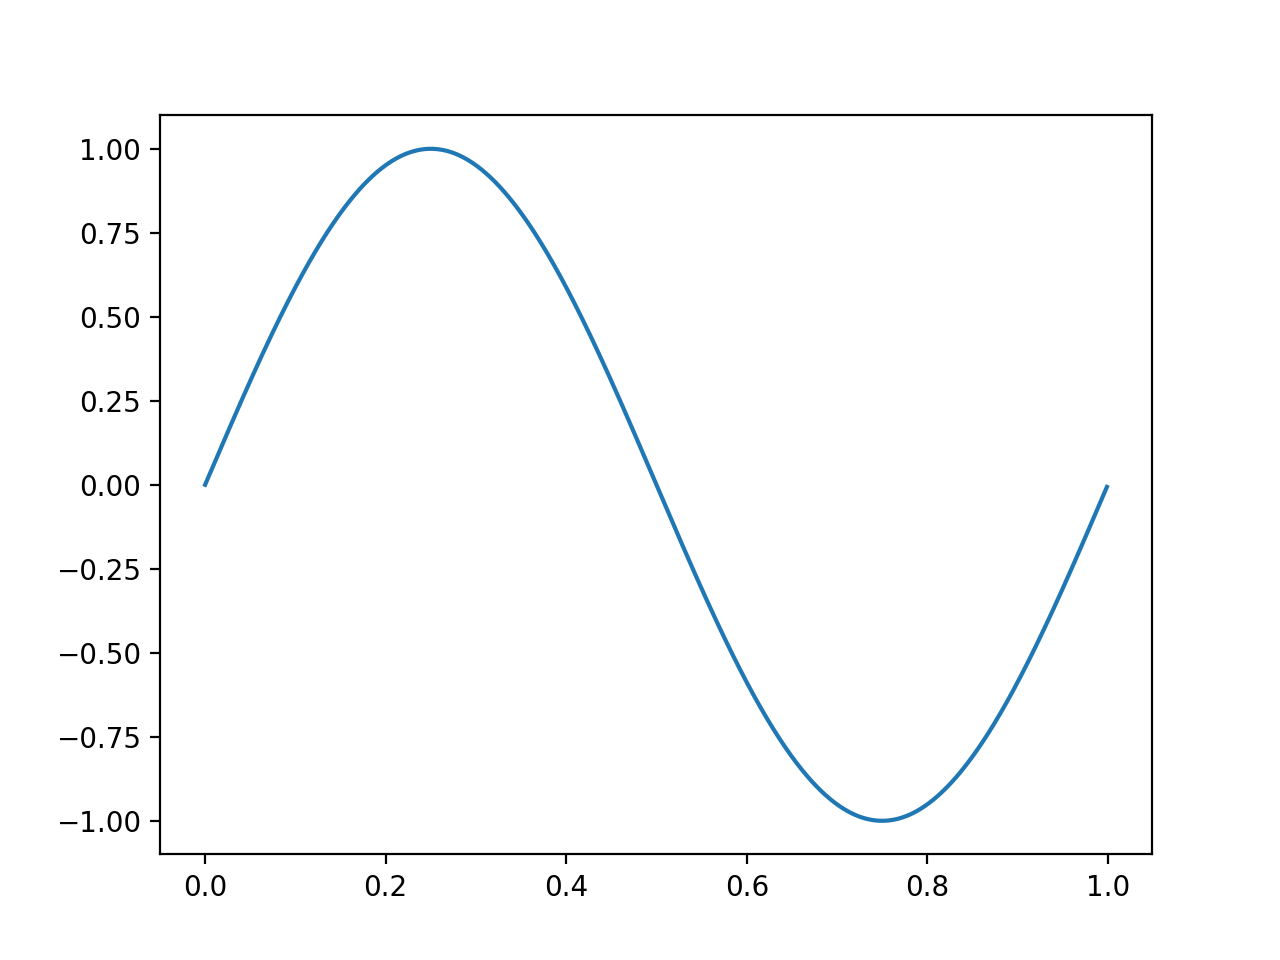

In [4]:
y = np.sin(2*np.pi*t)
plt.figure('basic function')
plt.plot(t,y)

<IPython.core.display.Javascript object>


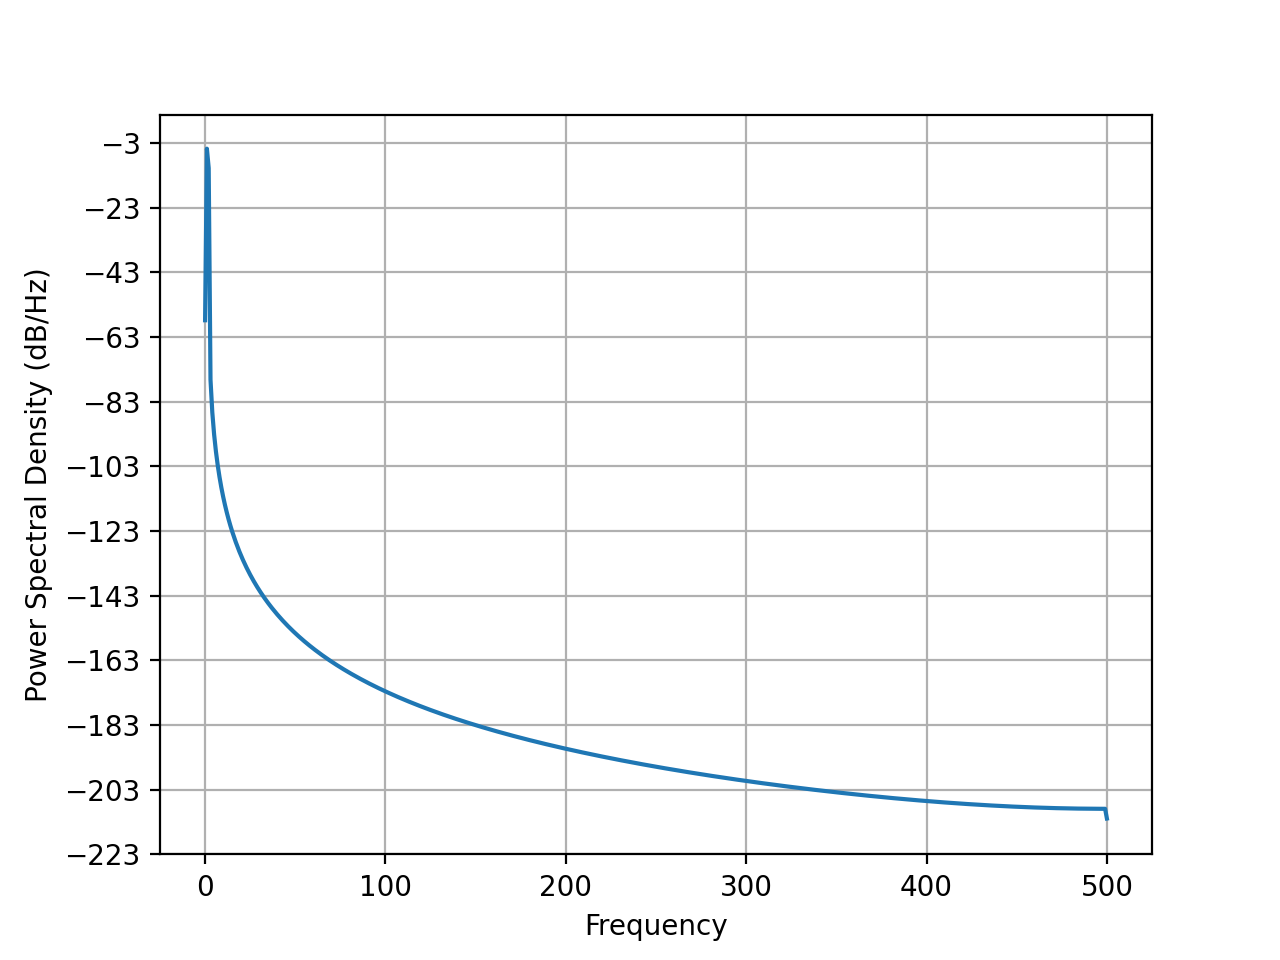

In [5]:
plt.figure('psd function test')
plt.psd(y,1000,1/dt)
plt.show()

In [6]:
#sum of two frequencies
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t)
#add some noise
f_n = f+2.5*np.random.randn(np.size(t))


<IPython.core.display.Javascript object>


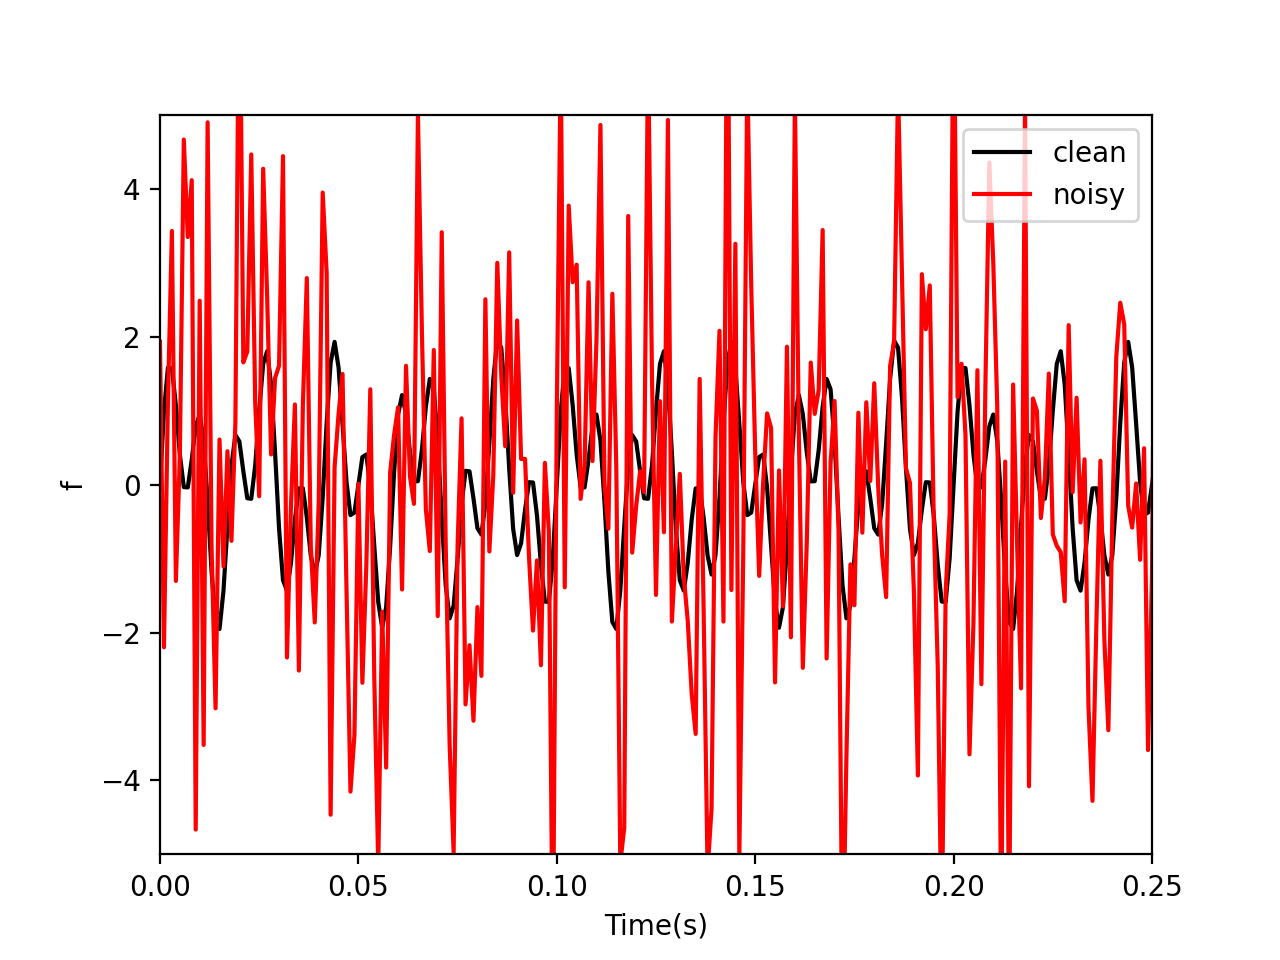

In [7]:
plt.figure('initial signal(s)')
plt.plot(t,f, color='black',label='clean')
plt.plot(t,f_n,color='red',label='noisy')
plt.xlabel('Time(s)')
plt.ylabel('f')
plt.xlim([0,0.25])
plt.ylim([-5,5])
plt.legend()
plt.show()

# Compute FFT and Power Spectral Density (PSD)

In [8]:
f_hat = np.fft.fft(f_n,len(t))

In [9]:
print(len(f_n))

1000


In [10]:
print(1/(dt*len(t)))

1.0


In [11]:
PSD = (f_hat*np.conjugate(f_hat))/len(t) #compute power spectral density 
freq = np.arange(0,len(t),(1/(dt*len(t)))) #create x axis freq in Hz


In [23]:
len(PSD)

1000

<IPython.core.display.Javascript object>


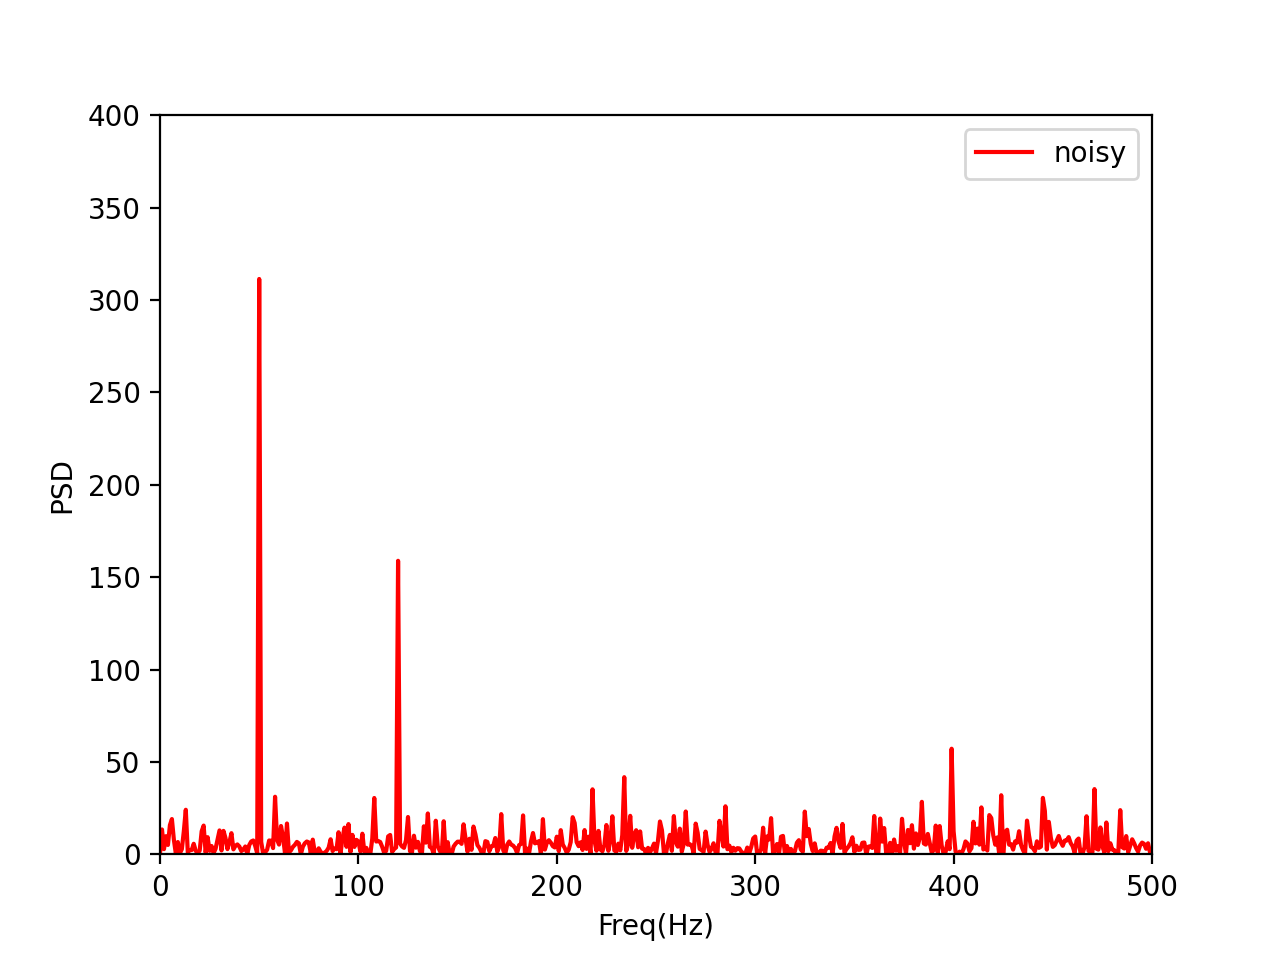

/Users/isaacberez/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [13]:
plt.figure('PSD plot')
plt.plot(freq,PSD, color = 'red',label='noisy')


plt.xlabel('Freq(Hz)')
plt.ylabel('PSD')
plt.xlim([0,500])
plt.ylim([0,400])
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


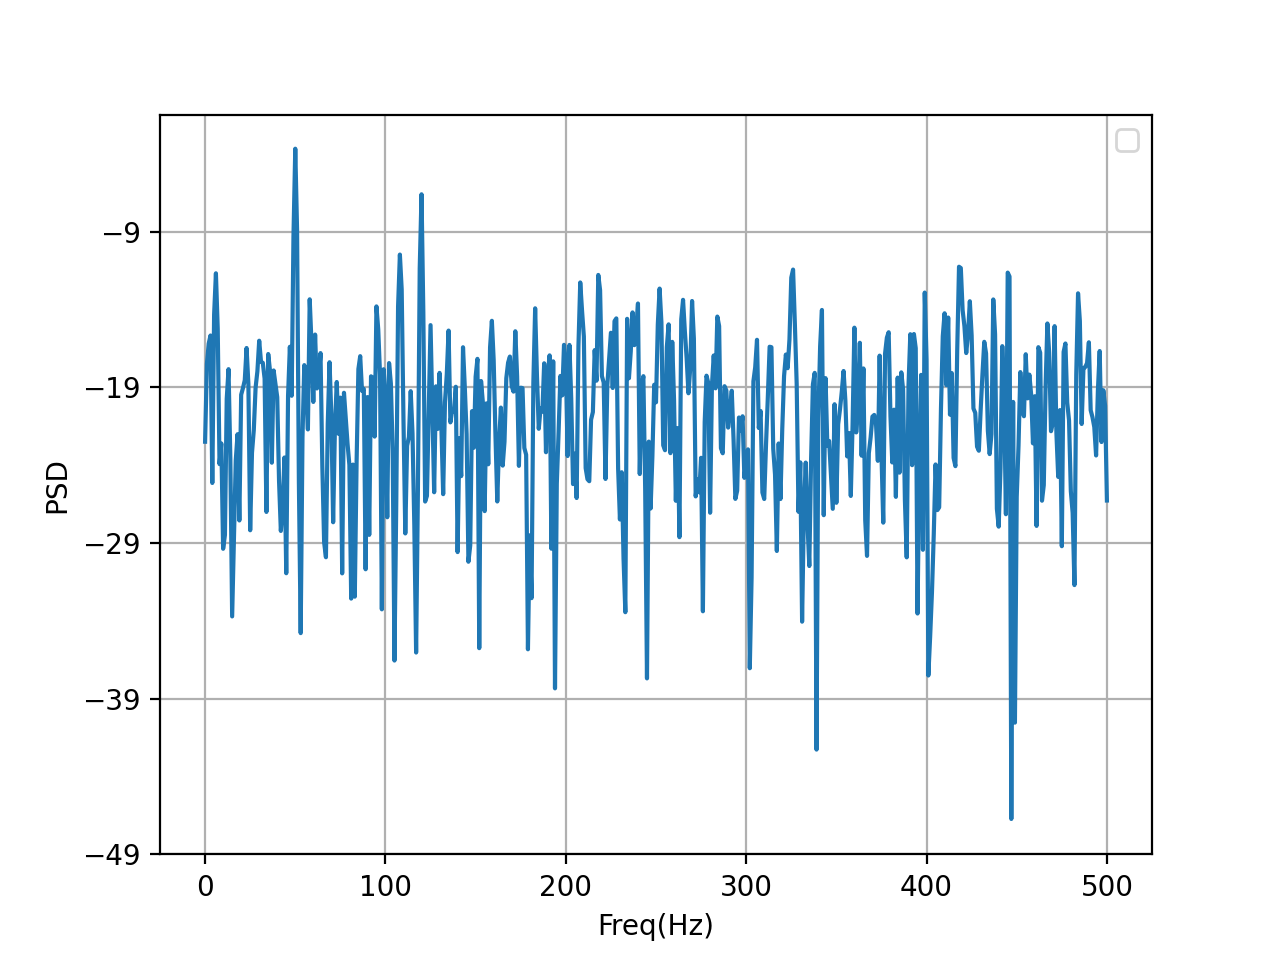

No handles with labels found to put in legend.


In [26]:
plt.figure('PSD plot using matplotlib psd function')
plt.psd(f_n,len(t),1/dt)


plt.xlabel('Freq(Hz)')
plt.ylabel('PSD')
#plt.xlim([0,500])
#plt.ylim([0,400])
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


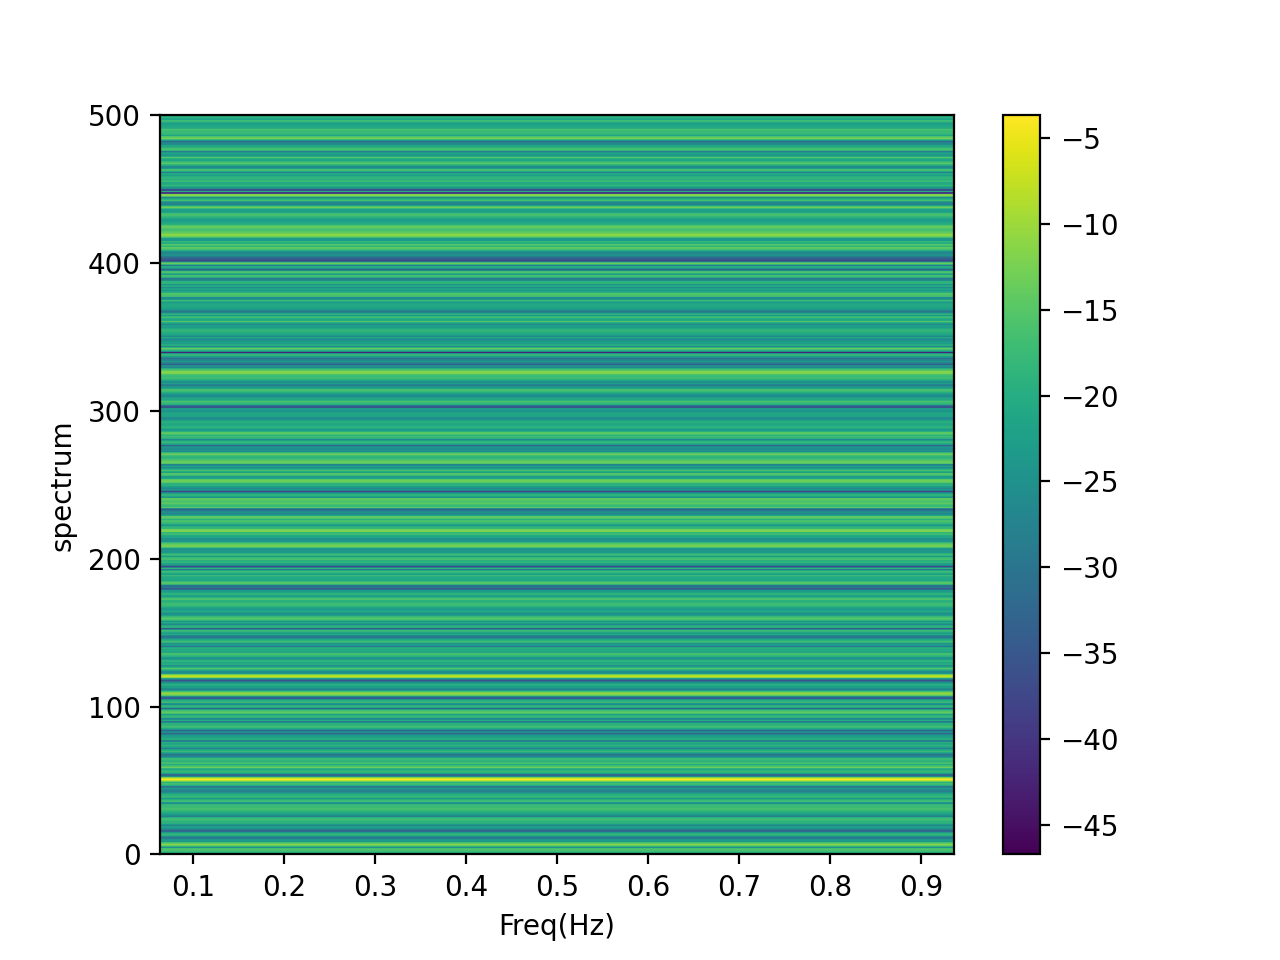

/var/folders/51/gj172yh92pn1yfqvqv318v540000gn/T/ipykernel_17679/2891594937.py:2: UserWarning: Only one segment is calculated since parameter NFFT (=1000) >= signal length (=1000).
  plt.specgram(f_n,1000,1/dt)


In [15]:
plt.figure('Spectrogram plot using matplotlib spectrogram function')
plt.specgram(f_n,1000,1/dt)


plt.xlabel('Freq(Hz)')
plt.ylabel('spectrum')
#plt.xlim([0,500])
#plt.ylim([0,400])
plt.colorbar()
plt.show()

# Use PSD to find freqs with large power

In [16]:
PSD_clean = [0 if power<100 else power for power in PSD] #find all freqs with power > 100, zero everything else

<IPython.core.display.Javascript object>


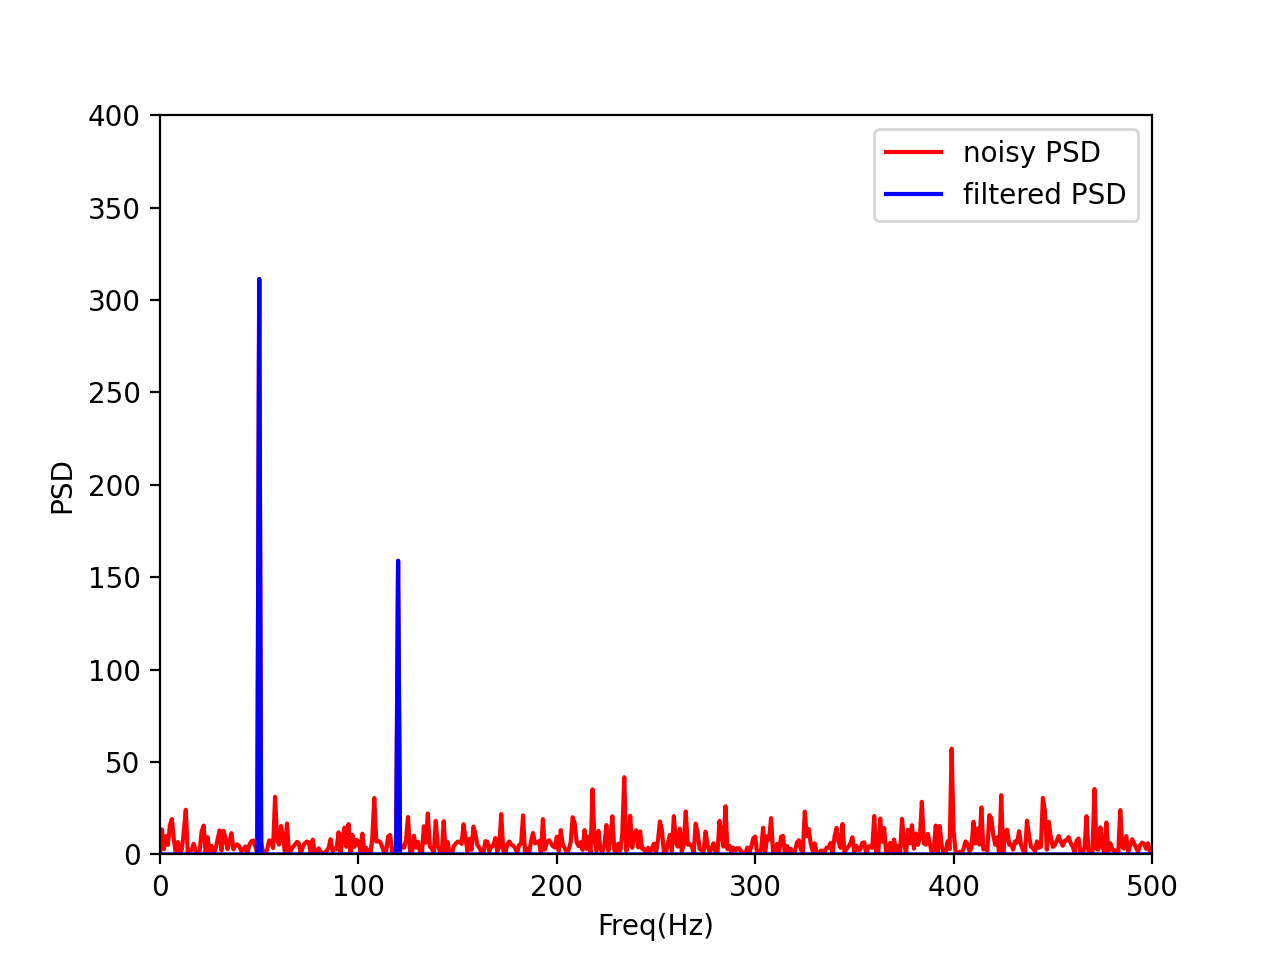

/Users/isaacberez/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/isaacberez/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [17]:
plt.figure('Original and Filtered PSDs')
plt.plot(freq,PSD, color = 'red',label='noisy PSD')
plt.plot(freq, PSD_clean,  color = 'blue', label='filtered PSD')

plt.xlabel('Freq(Hz)')
plt.ylabel('PSD')
plt.xlim([0,500])
plt.ylim([0,400])
plt.legend()
plt.show()

In [18]:
indices = np.where(PSD>100)
print(indices)

(array([ 50, 120, 880, 950]),)


In [19]:
values = f_hat[indices]
print(values)

[ 44.20712602-556.25739935j -27.16272785-397.66177185j
 -27.16272785+397.66177185j  44.20712602+556.25739935j]


# Use PSD to zero out small fourier coeff. in f_hat

In [20]:
f_hat_filtered = [0 if f not in f_hat[indices] else f for f in f_hat ] #zero out all smal fourier coeff.

In [21]:
f_inv_filt = np.fft.ifft(f_hat_filtered)

<IPython.core.display.Javascript object>


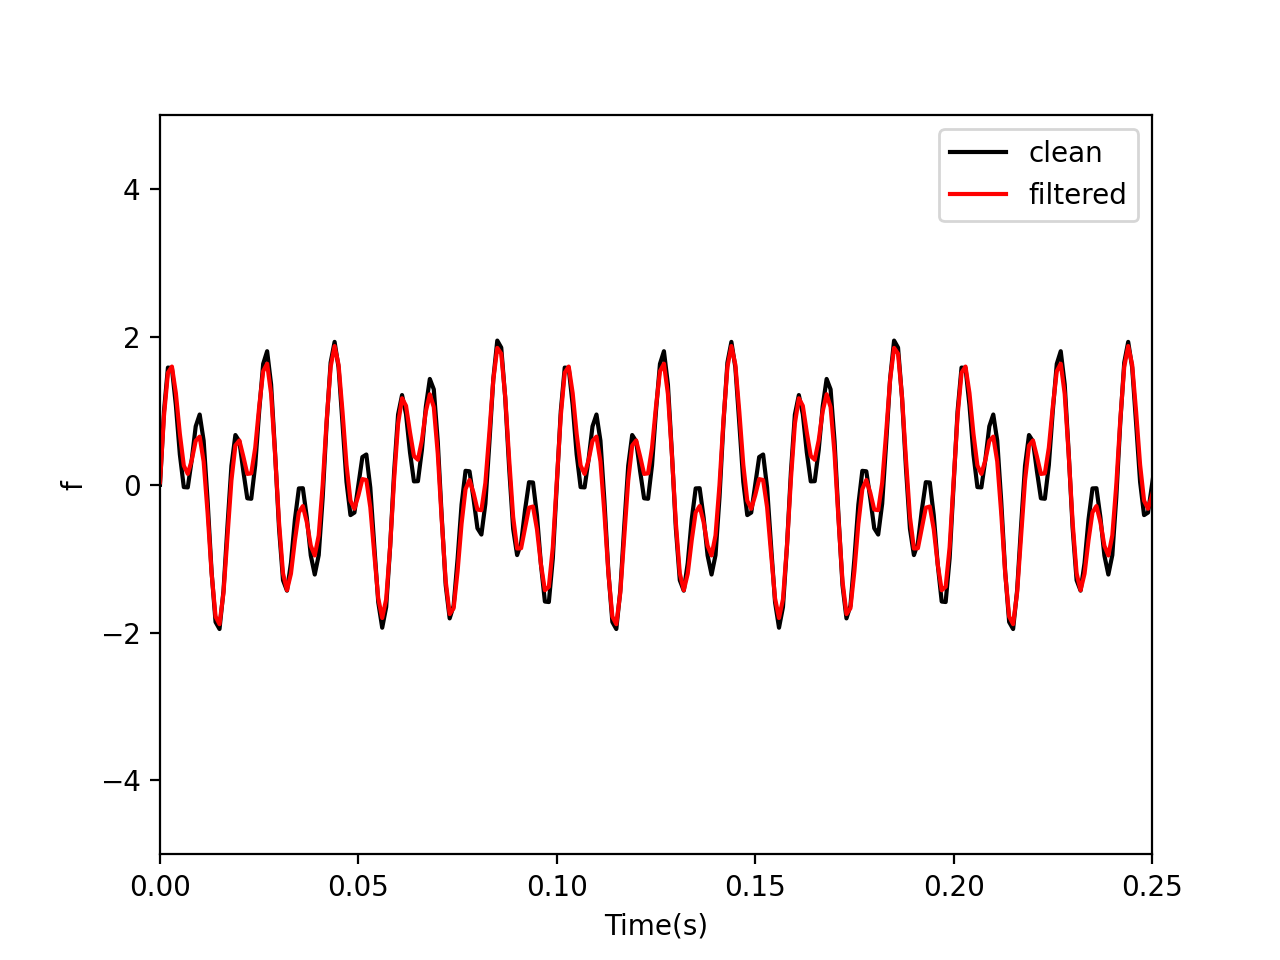

/Users/isaacberez/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [22]:
plt.figure('Filtered Signal Plotted Against Original Clean Signal')

plt.plot(t,f, color='black',label='clean')
plt.plot(t,f_inv_filt,color='red',label='filtered')
plt.xlabel('Time(s)')
plt.ylabel('f')
plt.xlim([0,0.25])
plt.ylim([-5,5])
plt.legend()
plt.show()